In [1]:
import matplotlib.pyplot as plt
from models import QVoter
import numpy as np
import networkx as nx
from tqdm import tqdm

import pandas as pd
import pickle

models/q_voter.py

In [2]:
""" Model simulations. """
""" global parameters set"""
num_of_steps = 5  # * 100
N = 100
q = [4]
f = [0.2, 0.3, 0.4, 0.5]
p = np.arange(0, 1.01, 0.025)

MC_runs = 996

In [40]:
# data collection, available in `get_results_multithread.py`
"""
all the data is storaged in the list:
[
[name_of_initial_graph, q_0, p_0, f_0, [average concentration for each of <num_of_steps> steps]
[name_of_initial_graph, q_1, p_1, f_1, [average concentration for each of <num_of_steps> steps]
.
.
.
[name_of_initial_graph, q_n, p_n, f_n, [average concentration for each of <num_of_steps> steps]
]
"""
pass

In [30]:
with open('data/all_data.pickle', 'rb') as handle:
    df = pickle.load(handle)
df

,graph_name,q,p,f,avg_concentration_over_time
0,complete-graph(100),4,0.000,0.2,"[1.0, 1.0, 1.0, 1.0, 1.0]"
1,complete-graph(100),4,0.025,0.2,"[0.9942168674698832, 0.9946485943775137, 0.994..."
2,complete-graph(100),4,0.050,0.2,"[0.9894176706827378, 0.9892771084337418, 0.989..."
3,complete-graph(100),4,0.075,0.2,"[0.9824397590361547, 0.982399598393584, 0.9836..."
4,complete-graph(100),4,0.100,0.2,"[0.976797188755031, 0.9753714859437868, 0.9769..."
...,...,...,...,...,...
159,complete-graph(100),4,0.900,0.5,"[0.5030421686746991, 0.49931726907630497, 0.50..."
160,complete-graph(100),4,0.925,0.5,"[0.49796184738955795, 0.5011244979919675, 0.50..."
161,complete-graph(100),4,0.950,0.5,"[0.49915662650602377, 0.501305220883534, 0.503..."
162,complete-graph(100),4,0.975,0.5,"[0.4995783132530119, 0.49848393574297206, 0.49..."


* q = 4, complete graph (100)

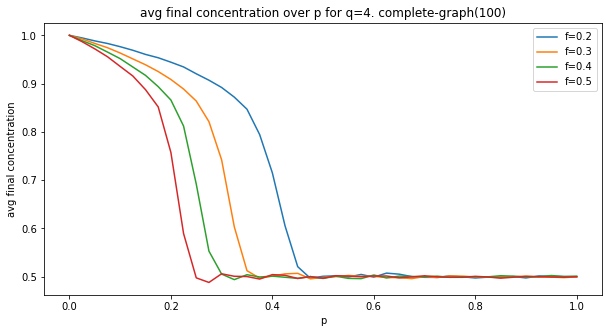

In [31]:
df['avg_final_concentration'] = df['avg_concentration_over_time'].apply(lambda x: x[-1])

q = 4
plt.figure(figsize=(10,5))
for f_i in df['f'].unique():
    sub_df = df[(df['f'] == f_i) & (df['q'] == q) ]
    plt.plot(sub_df['p'], sub_df['avg_final_concentration'], label = f'f={f_i}')
plt.legend()
plt.ylabel('avg final concentration')
plt.xlabel('p')
plt.title(f'avg final concentration over p for q={q}. {df.iloc[0,0]}')
plt.show()

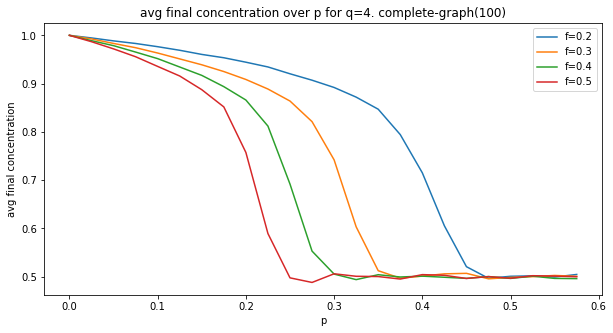

In [39]:
cut_point = 0.6

q = 4
plt.figure(figsize=(10,5))
for f_i in df['f'].unique():
    sub_df = df[(df['f'] == f_i) & (df['q'] == q) & (df['p'] < cut_point)]
    plt.plot(sub_df['p'], sub_df['avg_final_concentration'], label = f'f={f_i}')
plt.legend()
plt.ylabel('avg final concentration')
plt.xlabel('p')
plt.title(f'avg final concentration over p for q={q}. {df.iloc[0,0]}')
plt.show()

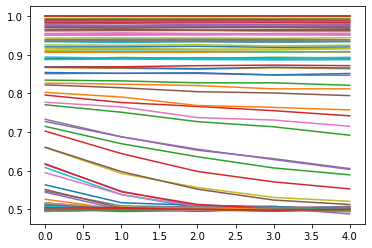

In [32]:
list_of_con = df['avg_concentration_over_time']
for k in range(len(list_of_con)):
    plt.plot(np.arange(0,len(list_of_con[k]),1), list_of_con[k])